In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [133]:
data = pd.read_csv("Mall_Customers.csv")

In [134]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: >

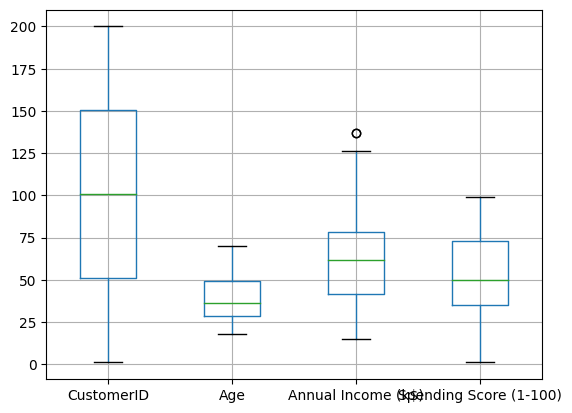

In [135]:
data.boxplot()

In [136]:
data[data['Annual Income (k$)'] > 125]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [188]:
data.drop(["CustomerID"], axis= 1, inplace= True)
data_clean = data.drop([196, 197,198,199])

<Axes: >

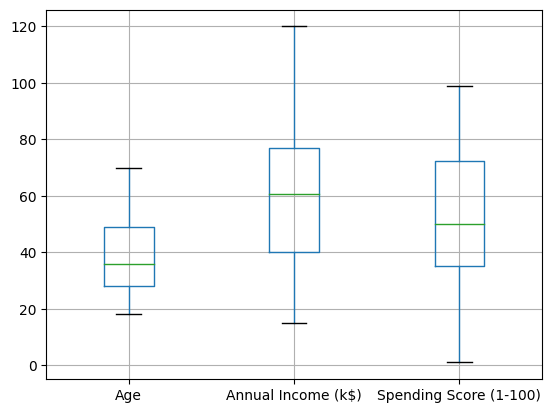

In [189]:
data_clean.boxplot()

In [190]:
data_dummy = pd.get_dummies(data_clean, drop_first = True)

In [191]:
data_dummy.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [226]:
#scaler = StandardScaler()
#data_processed = scaler.fit_transform(data_dummy)
#data_preprocessed = pd.DataFrame(data_processed, columns = ['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'])
data_processed = normalize(data_dummy)
data_preprocessed = pd.DataFrame(data_processed, columns = ['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'])

In [194]:
data_preprocessed.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,-7.250436e-17,-7.250436e-17,-1.132881e-18,5.437827e-17
std,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00
min,-1.491305e+00,-1.808460e+00,-1.913399e+00,-8.750804e-01
25%,-7.789099e-01,-7.835407e-01,-5.908296e-01,-8.750804e-01
50%,-2.089936e-01,5.689350e-02,-7.343196e-03,-8.750804e-01
75%,7.171205e-01,7.333405e-01,8.581616e-01,1.142752e+00
max,2.213151e+00,2.496202e+00,1.898712e+00,1.142752e+00


In [247]:
pca = PCA(n_components = None)
pca.fit(data_dummy)

PCA()

In [248]:
features = range(pca.n_components_)

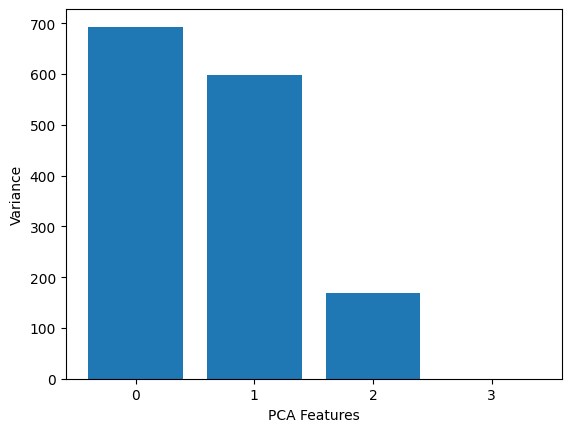

In [249]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

In [250]:
model = PCA(n_components = 2)

In [251]:
customers_pca = model.fit_transform(data_dummy)

In [252]:
ks = range(1,11)
inertias = []
for k in ks:
  km = KMeans(n_clusters = k, init= 'k-means++', random_state = 42)
  km.fit(customers_pca)
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

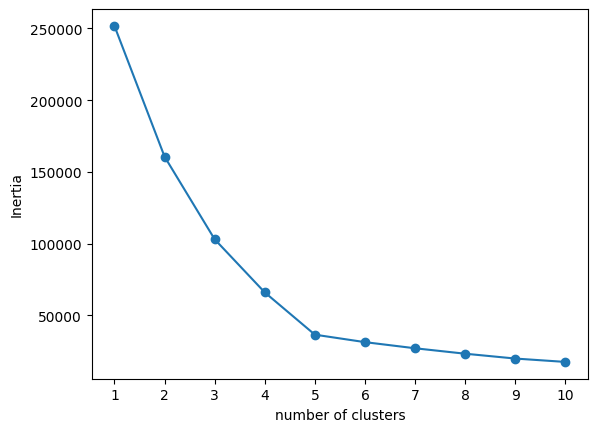

In [253]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [258]:
kmeans = KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(customers_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

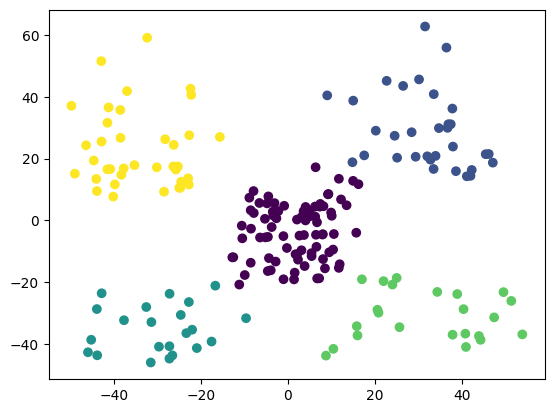

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4],
      dtype=int32)

In [259]:
labels = kmeans.predict(customers_pca)
xs = customers_pca[:, 0]
ys = customers_pca[:, 1]
plt.scatter(xs,ys, c = labels)
plt.show()
labels

In [260]:
print(silhouette_score(customers_pca, labels))

0.5651548838513426
